In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


**1. Importez vos données et effectuez la phase d'exploration de base des données**

In [ ]:
df= pd.read_csv('Credit_card_dataset.csv')

**2. Effectuer les étapes de préparation des données nécessaires (gestion des valeurs corrompues et manquantes, codage des données, gestion des valeurs aberrantes...)**

In [ ]:
df.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [ ]:
df.describe()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000
mean,0.877271,1003.204834,1733.143852,4494.449450,978.871112
std,0.236904,2136.634782,2895.063757,3638.815725,2097.163877
min,0.000000,0.000000,0.000000,50.000000,0.000000
25%,0.888889,39.635000,383.276166,1600.000000,0.000000
50%,1.000000,361.280000,856.901546,3000.000000,0.000000
75%,1.000000,1110.130000,1901.134317,6500.000000,1113.821139
max,1.000000,49039.570000,50721.483360,30000.000000,47137.211760


Valeurs manquantes et corrompues

In [ ]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE_FREQUENCY,0
PURCHASES,0
PAYMENTS,0
CREDIT_LIMIT,1
CASH_ADVANCE,0


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE_FREQUENCY,0
PURCHASES,0
PAYMENTS,0
CREDIT_LIMIT,0
CASH_ADVANCE,0


Gérer les valeurs abérrantes

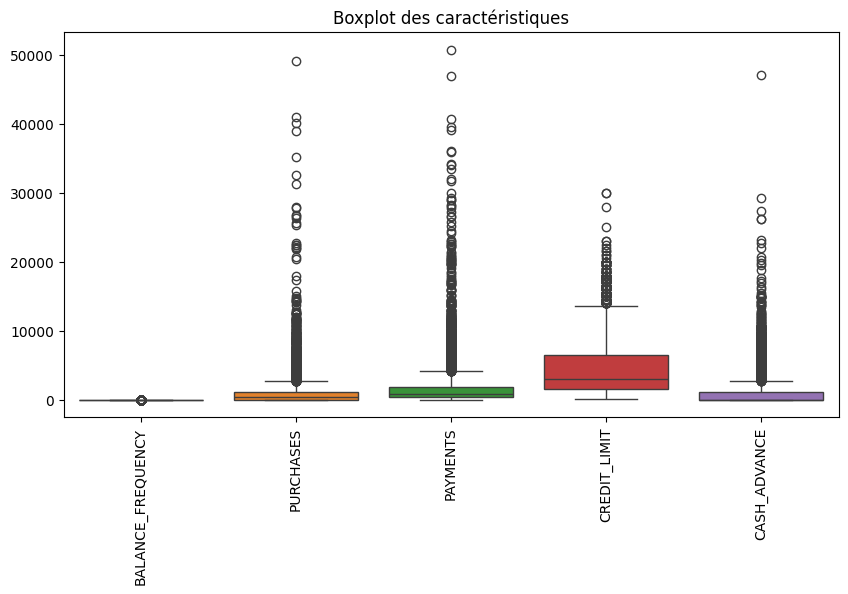

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot des caractéristiques")
plt.show()

In [ ]:
df_filtered = df.drop(columns=['CUST_ID'])
df_filtered.head()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,0.818182,95.40,201.802084,1000.0,0.000000
1,0.909091,0.00,4103.032597,7000.0,6442.945483
2,1.000000,773.17,622.066742,7500.0,0.000000
3,0.636364,1499.00,0.000000,7500.0,205.788017
4,1.000000,16.00,678.334763,1200.0,0.000000


In [ ]:
Q1 = df_filtered.quantile(0.25)
Q3 = df_filtered.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (df_filtered < lower_bound) | (df_filtered > upper_bound)

# Supprimer les lignes contenant des valeurs aberrantes
df = df[~(outliers.any(axis=1))]

In [ ]:
df.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.0
2,C10003,1.000000,773.17,622.066742,7500.0,0.0
4,C10005,1.000000,16.00,678.334763,1200.0,0.0
5,C10006,1.000000,1333.28,1400.057770,1800.0,0.0
7,C10008,1.000000,436.20,679.065082,2300.0,0.0


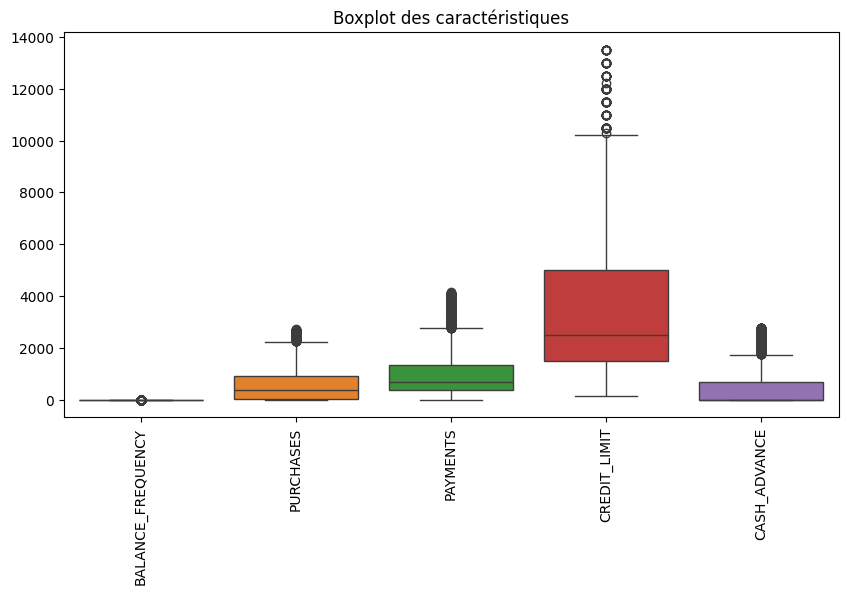

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot des caractéristiques")
plt.show()

**3. Effectuez un regroupement hiérarchique pour identifier les regroupements inhérents à vos données. Ensuite, tracez les clusters. (utilisez seulement 2 fonctionnalités.**

Je vais exclure la colonne des identifiants et je ne garde que les colonnes d'intéret :

In [ ]:
df_filtered = df.drop(columns=['CUST_ID','BALANCE_FREQUENCY','PAYMENTS','CASH_ADVANCE'])
df_filtered.head()

,PURCHASES,CREDIT_LIMIT
0,95.40,1000.0
2,773.17,7500.0
4,16.00,1200.0
5,1333.28,1800.0
7,436.20,2300.0


In [ ]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(df_filtered)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
agglomerative=pd.DataFrame(clust_labels)

In [ ]:
agglomerative

,0
0,3
1,0
2,3
3,3
4,4
...,...
5615,4
5616,3
5617,3
5618,3


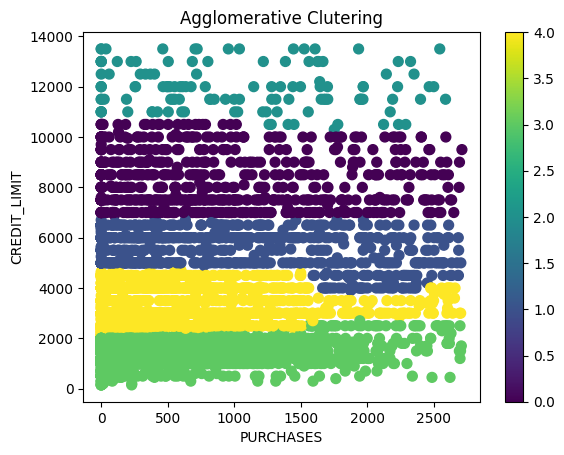

In [ ]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (df ['PURCHASES'] , df ["CREDIT_LIMIT"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("PURCHASES")
ax.set_ylabel("CREDIT_LIMIT")
plt.colorbar(scatter)

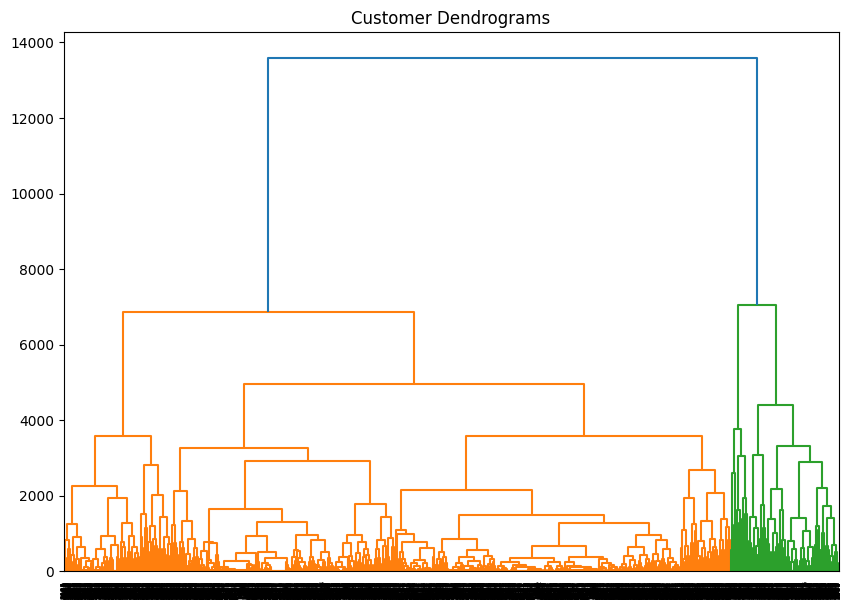

In [ ]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(df_filtered, method="complete"))

**4.Effectuez un clustering partitionnel à l'aide de l'algorithme K-means. Ensuite, tracez les clusters**

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
Sum_of_squared_distances = []
K = range(1, 15)

for k in K:
    km = KMeans(n_clusters=k, n_init=10)  # Ajout explicite de n_init
    km = km.fit(df_filtered)
    Sum_of_squared_distances.append(km.inertia_)


Text(0.5, 1.0, 'Elbow Method for optimal k')

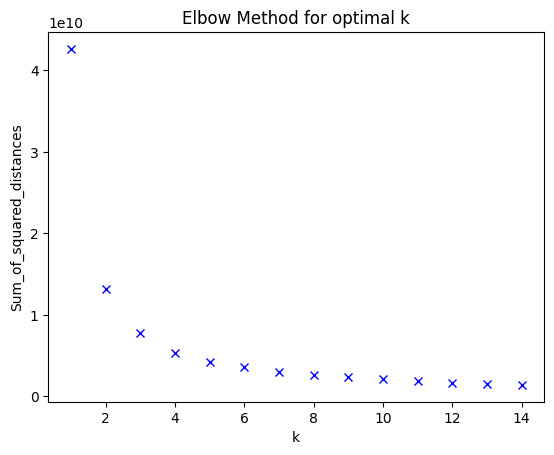

In [ ]:
plt.plot(K,Sum_of_squared_distances, 'bx')
plt.xlabel ('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method for optimal k')
#plt.show

**5. Trouvez la meilleure valeur k et tracez à nouveau les clusters.**

La meilleur valeur de k est 3

In [ ]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(df_filtered)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

agglomerative=pd.DataFrame(clust_labels)
agglomerative

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,0
0,0
1,1
2,0
3,0
4,0
...,...
5615,0
5616,0
5617,0
5618,0


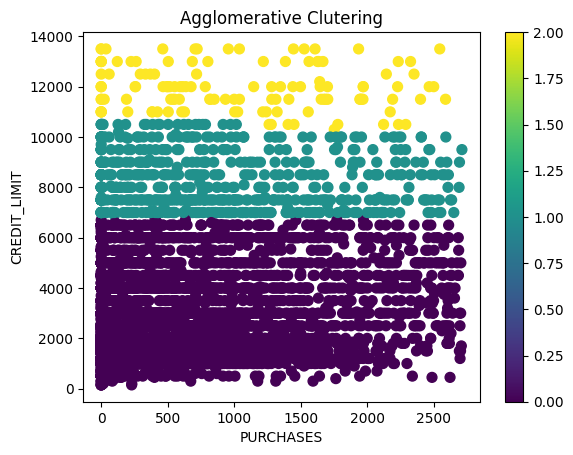

In [ ]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (df ['PURCHASES'] , df ["CREDIT_LIMIT"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("PURCHASES")
ax.set_ylabel("CREDIT_LIMIT")
plt.colorbar(scatter)

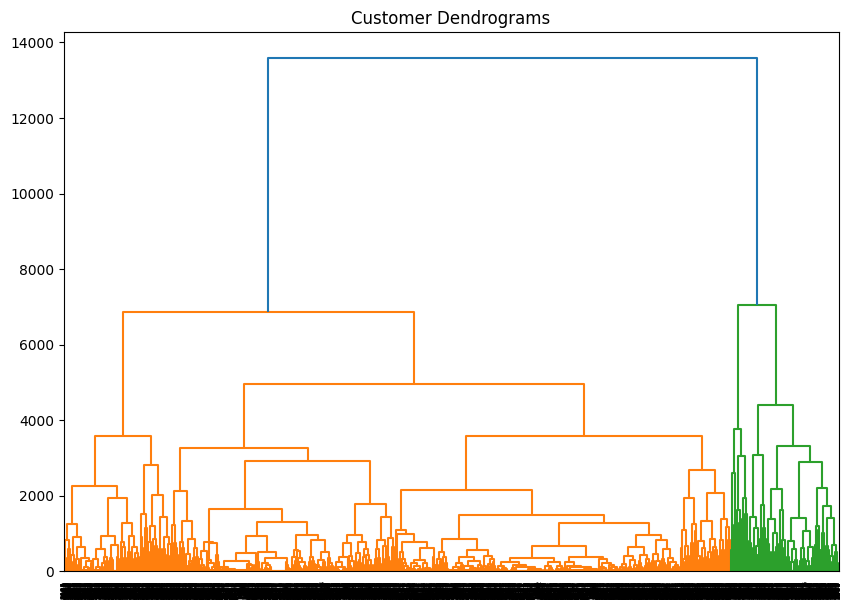

In [ ]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(df_filtered, method="complete"))

**6.Interpréter les résultats**

Idéalement il faut diviser la clientèle par 3 groupes